In [1]:
import new_analysis
import pandas as pd
import root_pandas as rp
import uproot as ur
import numpy as np
import matplotlib.pyplot as plt
import ROOT
import array
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.lines import Line2D
from matplotlib import rc
rc('text', usetex=False)

Welcome to JupyROOT 6.22/02


/home/jeef/anaconda3/envs/my_root_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/jeef/workspace/jeff_workspace/analysis/phase3/new_analysis.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  means[col]=0 #will be deleted at the end. Used so we can append rows of means
/home/jeef/workspace/jeff_workspace/analysis/phase3/new_analysis.py:271: SettingWithCopyWarning: 
A value is trying 

In [2]:
a = new_analysis.analysis()

/home/jeef/workspace/jeff_workspace/analysis/phase3/new_analysis.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  means[col]=0 #will be deleted at the end. Used so we can append rows of means
/home/jeef/workspace/jeff_workspace/analysis/phase3/new_analysis.py:271: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errs[col] = 0
/home/jeef/workspace/jeff_workspace/analysis/phase3/new_analysis.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [11]:
data = a.get_raw_study_data()
data.columns
avg1 = a.compute_means_and_errs('LER', 'Cont_inj', 12)
avg2 = a.compute_means_and_errs('LER', 'Decay', 12)
avg3 = a.compute_means_and_errs('HER', 'Cont_inj', 12)
avg4 = a.compute_means_and_errs('HER', 'Decay', 12)
data_avg = avg1.append([avg2,avg3,avg4])
data_avg.index = [i for i in range(0,len(data_avg))]
data_avg['ts_err']= data_avg['ts_err']/3600
data_avg['ts']=(data_avg['ts']-data['ts'].iloc[0])/3600
data['ts']=(data['ts']-data['ts'].iloc[0])/3600

/home/jeef/workspace/jeff_workspace/analysis/phase3/new_analysis.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  means[col]=0 #will be deleted at the end. Used so we can append rows of means
/home/jeef/workspace/jeff_workspace/analysis/phase3/new_analysis.py:271: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errs[col] = 0
/home/jeef/workspace/jeff_workspace/analysis/phase3/new_analysis.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [12]:
data_avg.keys()

Index(['ts', 'I_HER', 'I_LER', 'P_HER', 'P_LER', 'Sy_HER', 'Sy_LER',
       'ECL_lumi', 'LER_study_flag', 'HER_study_flag', 'Lumi_study_flag',
       'Cont_inj_flag', 'Decay_flag', 'Nb_HER', 'Nb_LER', '__index__',
       'tako_neutrons', 'palila_neutrons', 'elepaio_neutrons', 'iiwi_neutrons',
       'nene_neutrons', 'humu_neutrons', 'ts_err', 'I_HER_err', 'I_LER_err',
       'P_HER_err', 'P_LER_err', 'Sy_HER_err', 'Sy_LER_err', 'ECL_lumi_err',
       '__index___err', 'tako_neutrons_err', 'palila_neutrons_err',
       'elepaio_neutrons_err', 'iiwi_neutrons_err', 'nene_neutrons_err',
       'humu_neutrons_err'],
      dtype='object')

In [13]:
bins = 12
study_types = ['LER', 'HER']
study_periods = ["Cont_inj", "Decay"]
tpcs = ['iiwi', 'nene', 'humu', 'palila', 'tako', 'elepaio']
fit_params = {}
fit_bg  = {}
fit_bg_err = {}
fit_t = {}
fit_t_err = {}
fit = {}
fit_err = {}
for study_type in study_types:
    for study_period in study_periods:
        fit_params[study_period + '_' + study_type] = a.get_fit_parameters(study_type, study_period, bins)
        for tpc in tpcs:
            fit_bg[tpc+'_'+study_period+'_'+ study_type] = fit_params[study_period + '_' + study_type][tpc+'_B0']*data_avg['I_%s'%(study_type)] + fit_params[study_period + '_' + study_type][tpc+'_B1']*data_avg['I_%s'%(study_type)]**2
            fit_bg_err[tpc+'_'+study_period+ '_'+study_type] = np.sqrt((fit_params[study_period + '_' + study_type][tpc+'_B0_err']*data_avg['I_%s'%(study_type)])**2 + (fit_params[study_period + '_' + study_type][tpc+'_B1_err']*data_avg['I_%s'%(study_type)]**2)**2)
            fit_t[tpc+'_'+study_period+'_'+ study_type] = fit_params[study_period + '_' + study_type][tpc+'_T']*data_avg['I_%s'%(study_type)]**2/(data_avg['Sy_%s'%(study_type)]*data_avg['Nb_%s'%(study_type)])
            fit_t_err[tpc+'_'+study_period+'_'+ study_type] = fit_params[study_period + '_' + study_type][tpc+'_T_err']*data_avg['I_%s'%(study_type)]**2/(data_avg['Sy_%s'%(study_type)]*data_avg['Nb_%s'%(study_type)])
            fit[tpc+'_'+study_period+'_'+ study_type] = fit_params[study_period + '_' + study_type][tpc+'_B0']*data_avg['I_%s'%(study_type)] + fit_params[study_period + '_' + study_type][tpc+'_B1']*data_avg['I_%s'%(study_type)]**2 + fit_params[study_period + '_' + study_type][tpc+'_T']*data_avg['I_%s'%(study_type)]**2/(data_avg['Sy_%s'%(study_type)]*data_avg['Nb_%s'%(study_type)])
            #fit_err[tpc+'_'+study_period+'_'+ study_type] = np.sqrt(fit_bg_err[tpc+'_'+study_period+'_' + study_type]**2 + fit_t_err[tpc+'_'+study_period+'_' + study_type]**2)
            #use stat error for now
            fit_err[tpc+'_'+study_period+'_'+ study_type] = np.sqrt(((fit_params[study_period + '_' + study_type][tpc+'_B0']+ 2*fit_params[study_period + '_' + study_type][tpc+'_B1']**data_avg['I_%s'%(study_type)] + 
                                                                      2*fit_params[study_period + '_' + study_type][tpc+'_T']**data_avg['I_%s'%(study_type)]/(data_avg['Sy_%s'%(study_type)]*data_avg['Nb_%s'%(study_type)]))*data_avg['I_%s_err'%(study_type)])**2 + ((fit_params[study_period + '_' + study_type][tpc+'_T']**data_avg['I_%s'%(study_type)]**2/(data_avg['Sy_%s'%(study_type)]**2*data_avg['Nb_%s'%(study_type)]))*data_avg['Sy_%s_err'%(study_type)])**2)
            

/home/jeef/workspace/jeff_workspace/analysis/phase3/new_analysis.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  means[col]=0 #will be deleted at the end. Used so we can append rows of means
/home/jeef/workspace/jeff_workspace/analysis/phase3/new_analysis.py:271: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errs[col] = 0
/home/jeef/workspace/jeff_workspace/analysis/phase3/new_analysis.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

 FCN=68.0509 FROM MINOS     STATUS=SUCCESSFUL    163 CALLS         477 TOTAL
                     EDM=1.61448e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.00000e-05   9.33458e-06  -2.40462e-03** at limit **
   2  p1           1.00000e-08   8.11638e-08   1.30219e-05** at limit **
   3  p2           4.70461e-02   2.15706e-03   2.15706e-03  -2.05641e-03
 FCN=129.417 FROM MINOS     STATUS=SUCCESSFUL    117 CALLS         570 TOTAL
                     EDM=1.35359e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.00000e-05   9.78397e-06  -7.92316e-04** at limit **
   2  p1           9.67385e-08   4.06688e-07  -2.99468e-06  -1.19513e-01
   3  p2           1.03742e-01   

Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Info in <ROOT::Math::ParameterSettings>:

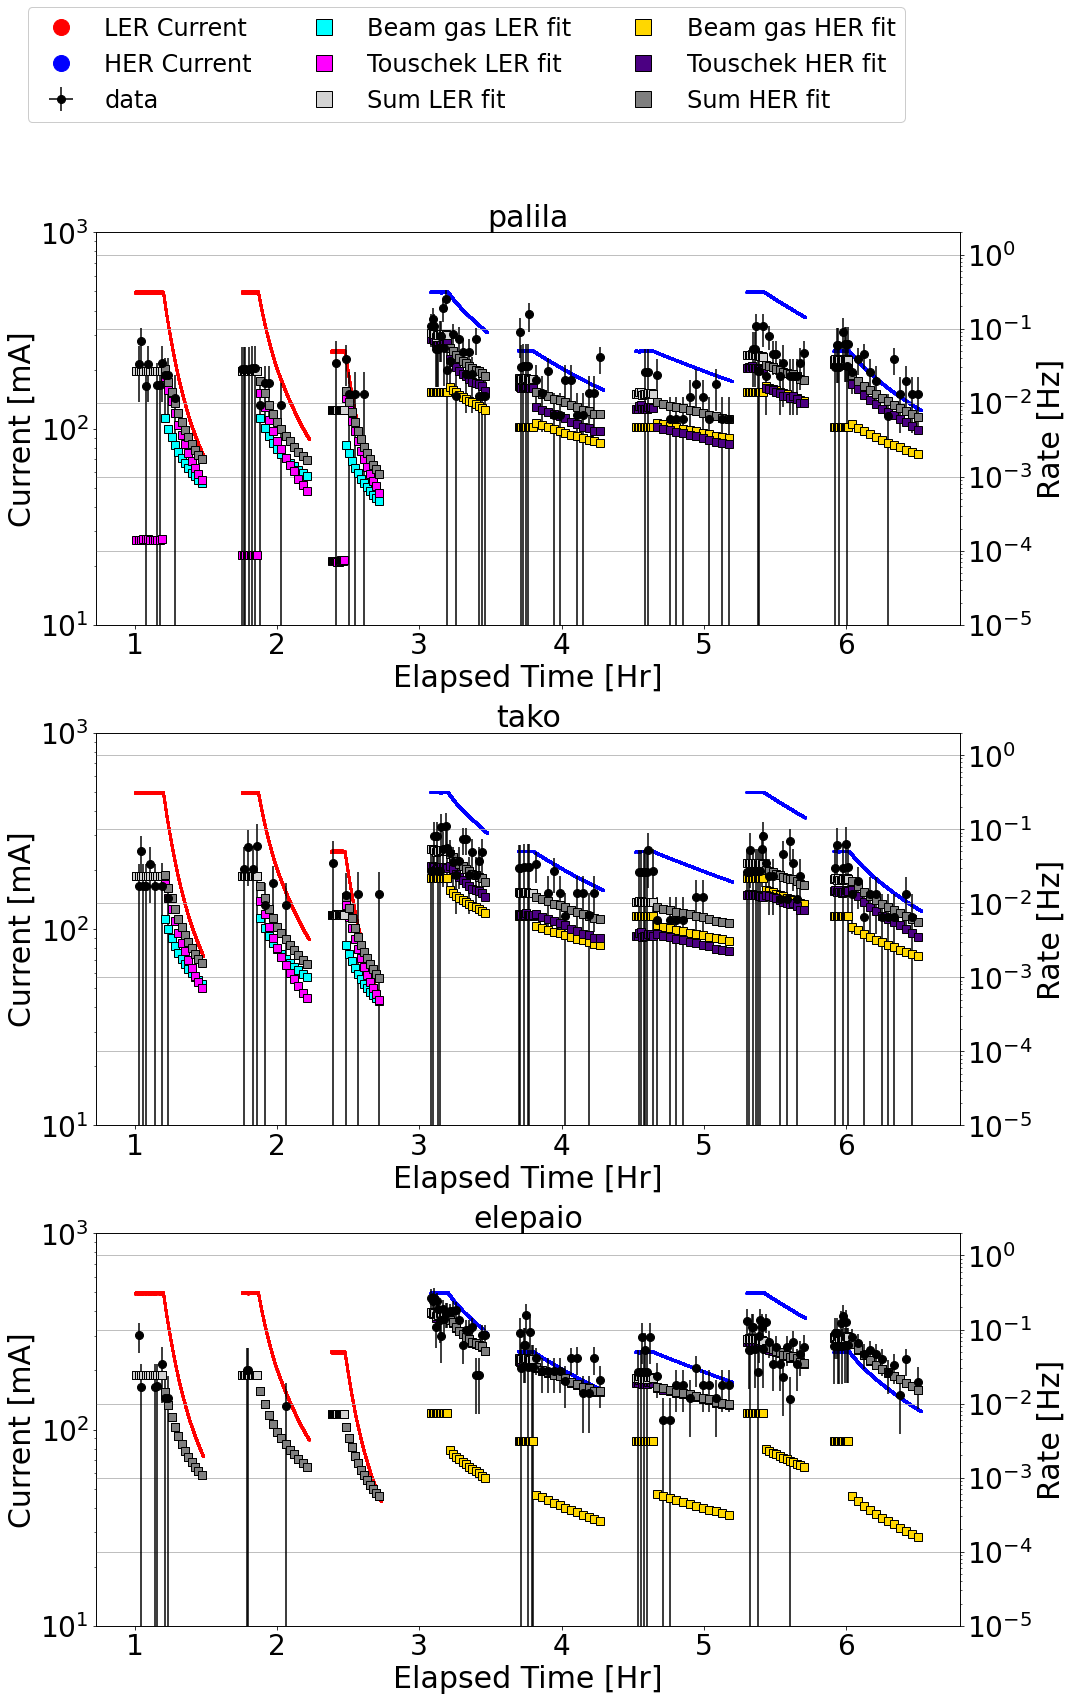

In [20]:
plt.rc('legend', fontsize=24)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=30)
plt.rc('axes', titlesize=30)
plt.figure(figsize = (15,21))
i = 1
for tpc in ['palila', 'tako', 'elepaio']:
    plt.subplot(3,1,i)
    plt.plot(data.loc[(data['LER_study_flag']==1) & (data['Cont_inj_flag']==1)]['ts'], data.loc[(data['LER_study_flag']==1) & (data['Cont_inj_flag']==1)]['I_LER'], 'o', color = 'red',markersize = 2)
    plt.plot(data.loc[(data['LER_study_flag']==1) & (data['Decay_flag']==1)]['ts'], data.loc[(data['LER_study_flag']==1) & (data['Decay_flag']==1)]['I_LER'], 'o', color = 'red',markersize = 2)
    plt.plot(data.loc[(data['HER_study_flag']==1) & (data['Cont_inj_flag']==1)]['ts'], data.loc[(data['HER_study_flag']==1) & (data['Cont_inj_flag']==1)]['I_HER'], 'o', color = 'blue',markersize = 2)
    plt.plot(data.loc[(data['HER_study_flag']==1) & (data['Decay_flag']==1)]['ts'], data.loc[(data['HER_study_flag']==1) & (data['Decay_flag']==1)]['I_HER'], 'o', color = 'blue',markersize = 2)
    plt.ylim(10,1000)
    plt.ylabel("Current [mA]")
    plt.xlabel('Elapsed Time [Hr]')
    plt.yscale("Log")
    plt.title("%s"%(tpc))
    plt.twinx()
    plt.grid()
    #if i%2 != 1:
    #    plt.ylim(0,1.5)
    #else:
    #    if i != 5:
    #        plt.ylim(0,0.2)
    #    else:
    #        plt.ylim(0,0.4)
    plt.yscale("Log")
    plt.ylim(1e-5,2)
    plt.plot(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts'], fit_bg['%s_Cont_inj_LER'%(tpc)][data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)].index.to_numpy()], 's', color = 'cyan', label = 'Predicted beam-gas rate', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts'], fit_bg['%s_Cont_inj_HER'%(tpc)][data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)].index.to_numpy()], 's', color = 'gold', label = 'Predicted beam-gas rate', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts'], fit_bg['%s_Decay_LER'%(tpc)][data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)].index.to_numpy()], 's', color = 'cyan', label = 'Predicted beam-gas rate', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts'], fit_bg['%s_Decay_HER'%(tpc)][data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)].index.to_numpy()], 's', color = 'gold', label = 'Predicted beam-gas rate', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts'], fit_t['%s_Cont_inj_LER'%(tpc)][data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)].index.to_numpy()], 's', color = 'magenta', label = 'Predicted Touschek rate', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts'], fit_t['%s_Cont_inj_HER'%(tpc)][data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)].index.to_numpy()], 's', color = 'indigo', label = 'Predicted Touschek rate', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts'], fit_t['%s_Decay_LER'%(tpc)][data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)].index.to_numpy()], 's', color = 'magenta', label = 'Predicted Touschek rate', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts'], fit_t['%s_Decay_HER'%(tpc)][data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)].index.to_numpy()], 's', color = 'indigo', label = 'Predicted Touschek rate', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts'], fit['%s_Cont_inj_LER'%(tpc)][data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)].index.to_numpy()], 's', color = 'lightgray', label = 'Predicted Touschek rate', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts'], fit['%s_Cont_inj_HER'%(tpc)][data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)].index.to_numpy()], 's', color = 'lightgray', label = 'Predicted Touschek rate', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts'], fit['%s_Decay_LER'%(tpc)][data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)].index.to_numpy()], 's', color = 'tab:gray', label = 'Predicted Touschek rate', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts'], fit['%s_Decay_HER'%(tpc)][data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)].index.to_numpy()], 's', color = 'tab:gray', label = 'Predicted Touschek rate', markersize = 8, markeredgecolor = 'black')
    p = plt.errorbar(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts'], data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)][tpc+'_neutrons'], data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)][tpc+'_neutrons_err'], data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts_err'], 'o', markersize = 8, color = 'black', label = 'data')
    plt.errorbar(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts'], data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)][tpc+'_neutrons'], data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)][tpc+'_neutrons_err'], data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts_err'], 'o', markersize = 8, color = 'black', label = 'data')
    plt.errorbar(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts'], data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)][tpc+'_neutrons'], data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)][tpc+'_neutrons_err'], data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts_err'], 'o', markersize = 8, color = 'black', label = 'data')
    plt.errorbar(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts'], data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)][tpc+'_neutrons'], data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)][tpc+'_neutrons_err'], data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts_err'], 'o', markersize = 8, color = 'black', label = 'data')
    plt.ylabel("Rate [Hz]")
    custom_lines = [Line2D([0], [0], color='red', label='LER Current', marker='o', linewidth = 0, markersize = 16),
                    Line2D([0], [0], color='blue', label='HER Current', marker='o', linewidth = 0, markersize = 16),
                    p,
                Line2D([0], [0], color='cyan', label='Beam gas LER fit', marker='s',markeredgecolor = 'black', linewidth = 0, markersize = 16),
                    Line2D([0], [0], color='magenta', label='Touschek LER fit', marker='s',markeredgecolor = 'black', linewidth = 0, markersize = 16),
                    Line2D([0], [0], color='lightgray', label='Sum LER fit', marker='s',markeredgecolor = 'black', linewidth = 0, markersize = 16),
                Line2D([0], [0], color='gold', label='Beam gas HER fit', marker='s', markeredgecolor = 'black',linewidth = 0, markersize = 16),
                   Line2D([0], [0], color='indigo', label='Touschek HER fit', marker='s', markeredgecolor = 'black',linewidth = 0, markersize = 16),
                    Line2D([0], [0], color='tab:gray', label='Sum HER fit', marker='s', markeredgecolor = 'black',linewidth = 0, markersize = 16)
                   ]
    i += 1
plt.tight_layout()
plt.legend(handles=custom_lines, loc='lower right', framealpha = 1, ncol = 3, bbox_to_anchor=(0.95, 3.8))
#plt.savefig("fit_comparison_bwd.png", bbox_inches='tight')

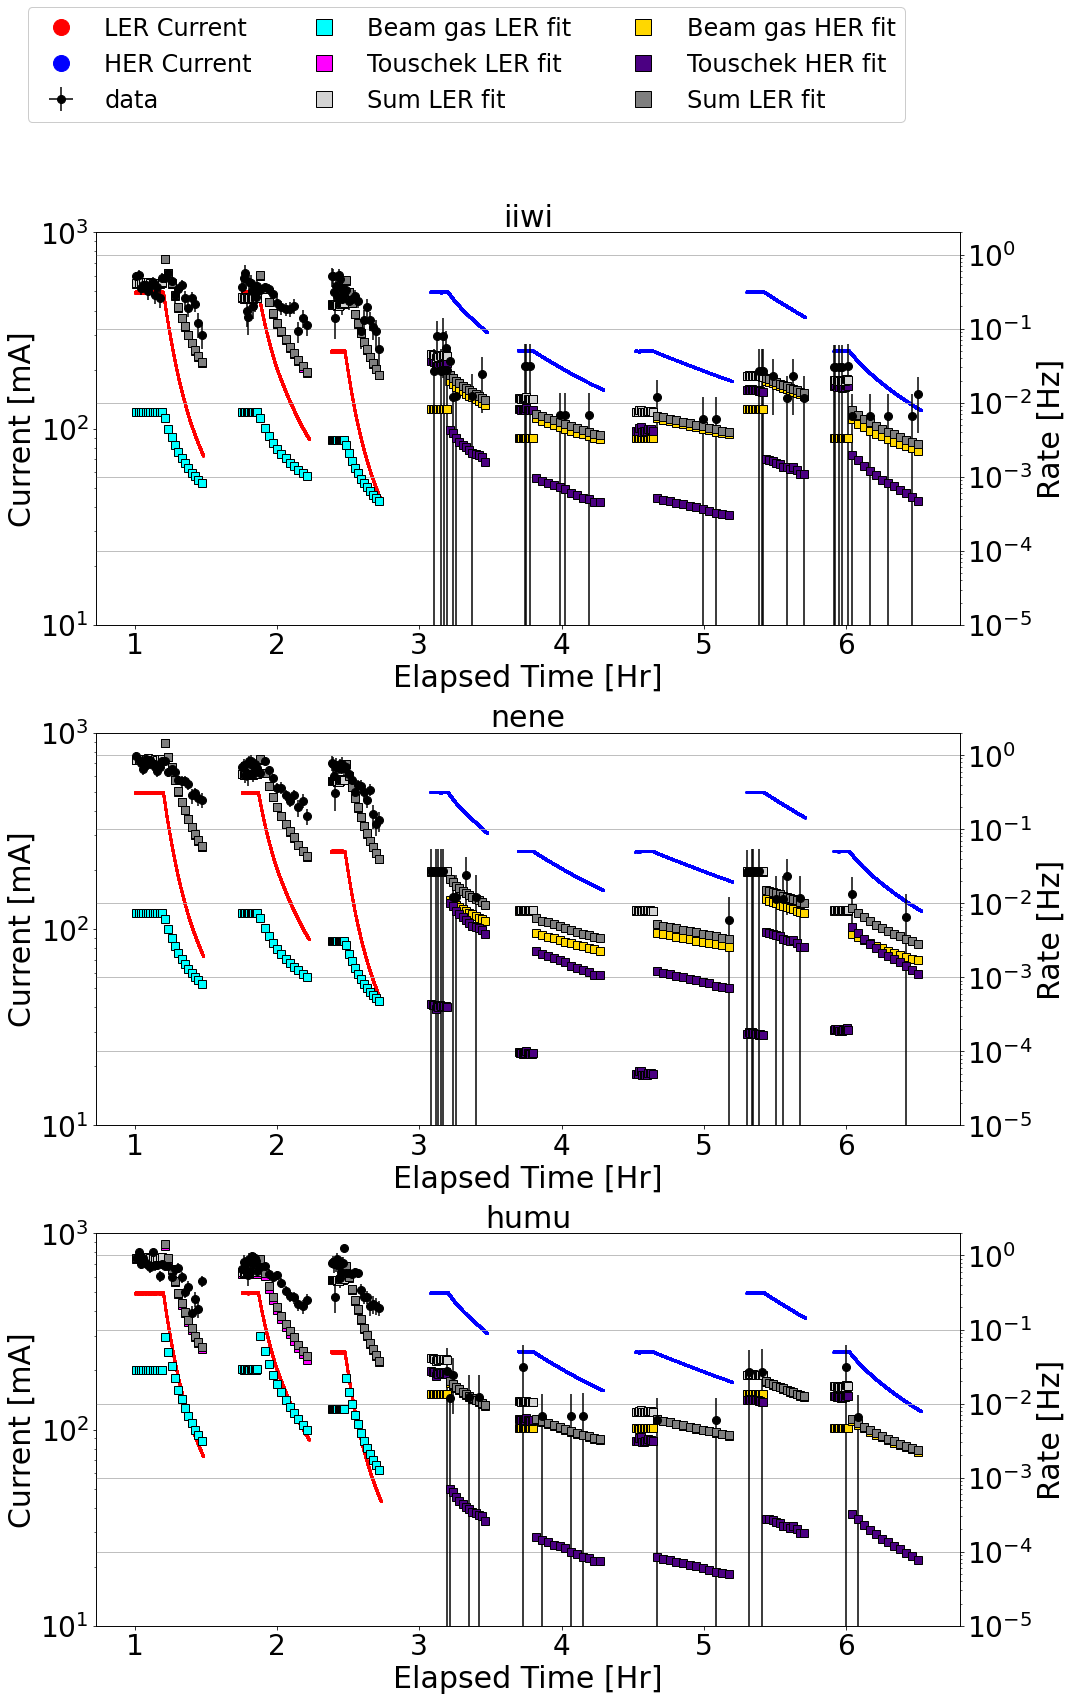

In [21]:
plt.rc('legend', fontsize=24)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=30)
plt.rc('axes', titlesize=30)
plt.figure(figsize = (15,21))
i = 1
for tpc in ['iiwi', 'nene', 'humu']:
    plt.subplot(3,1,i)
    plt.plot(data.loc[(data['LER_study_flag']==1) & (data['Cont_inj_flag']==1)]['ts'], data.loc[(data['LER_study_flag']==1) & (data['Cont_inj_flag']==1)]['I_LER'], 'o', color = 'red',markersize = 2)
    plt.plot(data.loc[(data['LER_study_flag']==1) & (data['Decay_flag']==1)]['ts'], data.loc[(data['LER_study_flag']==1) & (data['Decay_flag']==1)]['I_LER'], 'o', color = 'red',markersize = 2)
    plt.plot(data.loc[(data['HER_study_flag']==1) & (data['Cont_inj_flag']==1)]['ts'], data.loc[(data['HER_study_flag']==1) & (data['Cont_inj_flag']==1)]['I_HER'], 'o', color = 'blue',markersize = 2)
    plt.plot(data.loc[(data['HER_study_flag']==1) & (data['Decay_flag']==1)]['ts'], data.loc[(data['HER_study_flag']==1) & (data['Decay_flag']==1)]['I_HER'], 'o', color = 'blue',markersize = 2)
    plt.ylim(10,1000)
    plt.ylabel("Current [mA]")
    plt.xlabel('Elapsed Time [Hr]')
    plt.yscale("Log")
    plt.title("%s"%(tpc))
    plt.twinx()
    plt.grid()
    #if i%2 != 1:
    #    plt.ylim(0,1.5)
    #else:
    #    if i != 5:
    #        plt.ylim(0,0.2)
    #    else:
    #        plt.ylim(0,0.4)
    plt.yscale("Log")
    plt.ylim(1e-5,2)
    plt.plot(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts'], fit_bg['%s_Cont_inj_LER'%(tpc)][data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)].index.to_numpy()], 's', color = 'cyan', label = 'Predicted beam-gas rate', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts'], fit_bg['%s_Cont_inj_HER'%(tpc)][data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)].index.to_numpy()], 's', color = 'gold', label = 'Predicted beam-gas rate', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts'], fit_bg['%s_Decay_LER'%(tpc)][data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)].index.to_numpy()], 's', color = 'cyan', label = 'Predicted beam-gas rate', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts'], fit_bg['%s_Decay_HER'%(tpc)][data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)].index.to_numpy()], 's', color = 'gold', label = 'Predicted beam-gas rate', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts'], fit_t['%s_Cont_inj_LER'%(tpc)][data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)].index.to_numpy()], 's', color = 'magenta', label = 'Predicted Touschek rate', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts'], fit_t['%s_Cont_inj_HER'%(tpc)][data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)].index.to_numpy()], 's', color = 'indigo', label = 'Predicted Touschek rate', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts'], fit_t['%s_Decay_LER'%(tpc)][data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)].index.to_numpy()], 's', color = 'magenta', label = 'Predicted Touschek rate', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts'], fit_t['%s_Decay_HER'%(tpc)][data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)].index.to_numpy()], 's', color = 'indigo', label = 'Predicted Touschek rate', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts'], fit['%s_Cont_inj_LER'%(tpc)][data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)].index.to_numpy()], 's', color = 'lightgray', label = 'Predicted Touschek rate', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts'], fit['%s_Cont_inj_HER'%(tpc)][data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)].index.to_numpy()], 's', color = 'lightgray', label = 'Predicted Touschek rate', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts'], fit['%s_Decay_LER'%(tpc)][data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)].index.to_numpy()], 's', color = 'tab:gray', label = 'Predicted Touschek rate', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts'], fit['%s_Decay_HER'%(tpc)][data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)].index.to_numpy()], 's', color = 'tab:gray', label = 'Predicted Touschek rate', markersize = 8, markeredgecolor = 'black')
    p = plt.errorbar(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts'], data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)][tpc+'_neutrons'], data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)][tpc+'_neutrons_err'], data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts_err'], 'o', markersize = 8, color = 'black', label = 'data')
    plt.errorbar(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts'], data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)][tpc+'_neutrons'], data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)][tpc+'_neutrons_err'], data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts_err'], 'o', markersize = 8, color = 'black', label = 'data')
    plt.errorbar(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts'], data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)][tpc+'_neutrons'], data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)][tpc+'_neutrons_err'], data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts_err'], 'o', markersize = 8, color = 'black', label = 'data')
    plt.errorbar(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts'], data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)][tpc+'_neutrons'], data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)][tpc+'_neutrons_err'], data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts_err'], 'o', markersize = 8, color = 'black', label = 'data')
    plt.ylabel("Rate [Hz]")
    custom_lines = [Line2D([0], [0], color='red', label='LER Current', marker='o', linewidth = 0, markersize = 16),
                    Line2D([0], [0], color='blue', label='HER Current', marker='o', linewidth = 0, markersize = 16),
                    p,
                Line2D([0], [0], color='cyan', label='Beam gas LER fit', marker='s',markeredgecolor = 'black', linewidth = 0, markersize = 16),
                    Line2D([0], [0], color='magenta', label='Touschek LER fit', marker='s',markeredgecolor = 'black', linewidth = 0, markersize = 16),
                    Line2D([0], [0], color='lightgray', label='Sum LER fit', marker='s',markeredgecolor = 'black', linewidth = 0, markersize = 16),
                Line2D([0], [0], color='gold', label='Beam gas HER fit', marker='s', markeredgecolor = 'black',linewidth = 0, markersize = 16),
                   Line2D([0], [0], color='indigo', label='Touschek HER fit', marker='s', markeredgecolor = 'black',linewidth = 0, markersize = 16),
                    Line2D([0], [0], color='tab:gray', label='Sum LER fit', marker='s', markeredgecolor = 'black',linewidth = 0, markersize = 16)
                   ]
    i += 1
plt.tight_layout()
plt.legend(handles=custom_lines, loc='lower right', framealpha = 1, ncol = 3, bbox_to_anchor=(0.95, 3.8))
#plt.savefig("fit_comparison_fwd.png", bbox_inches='tight')

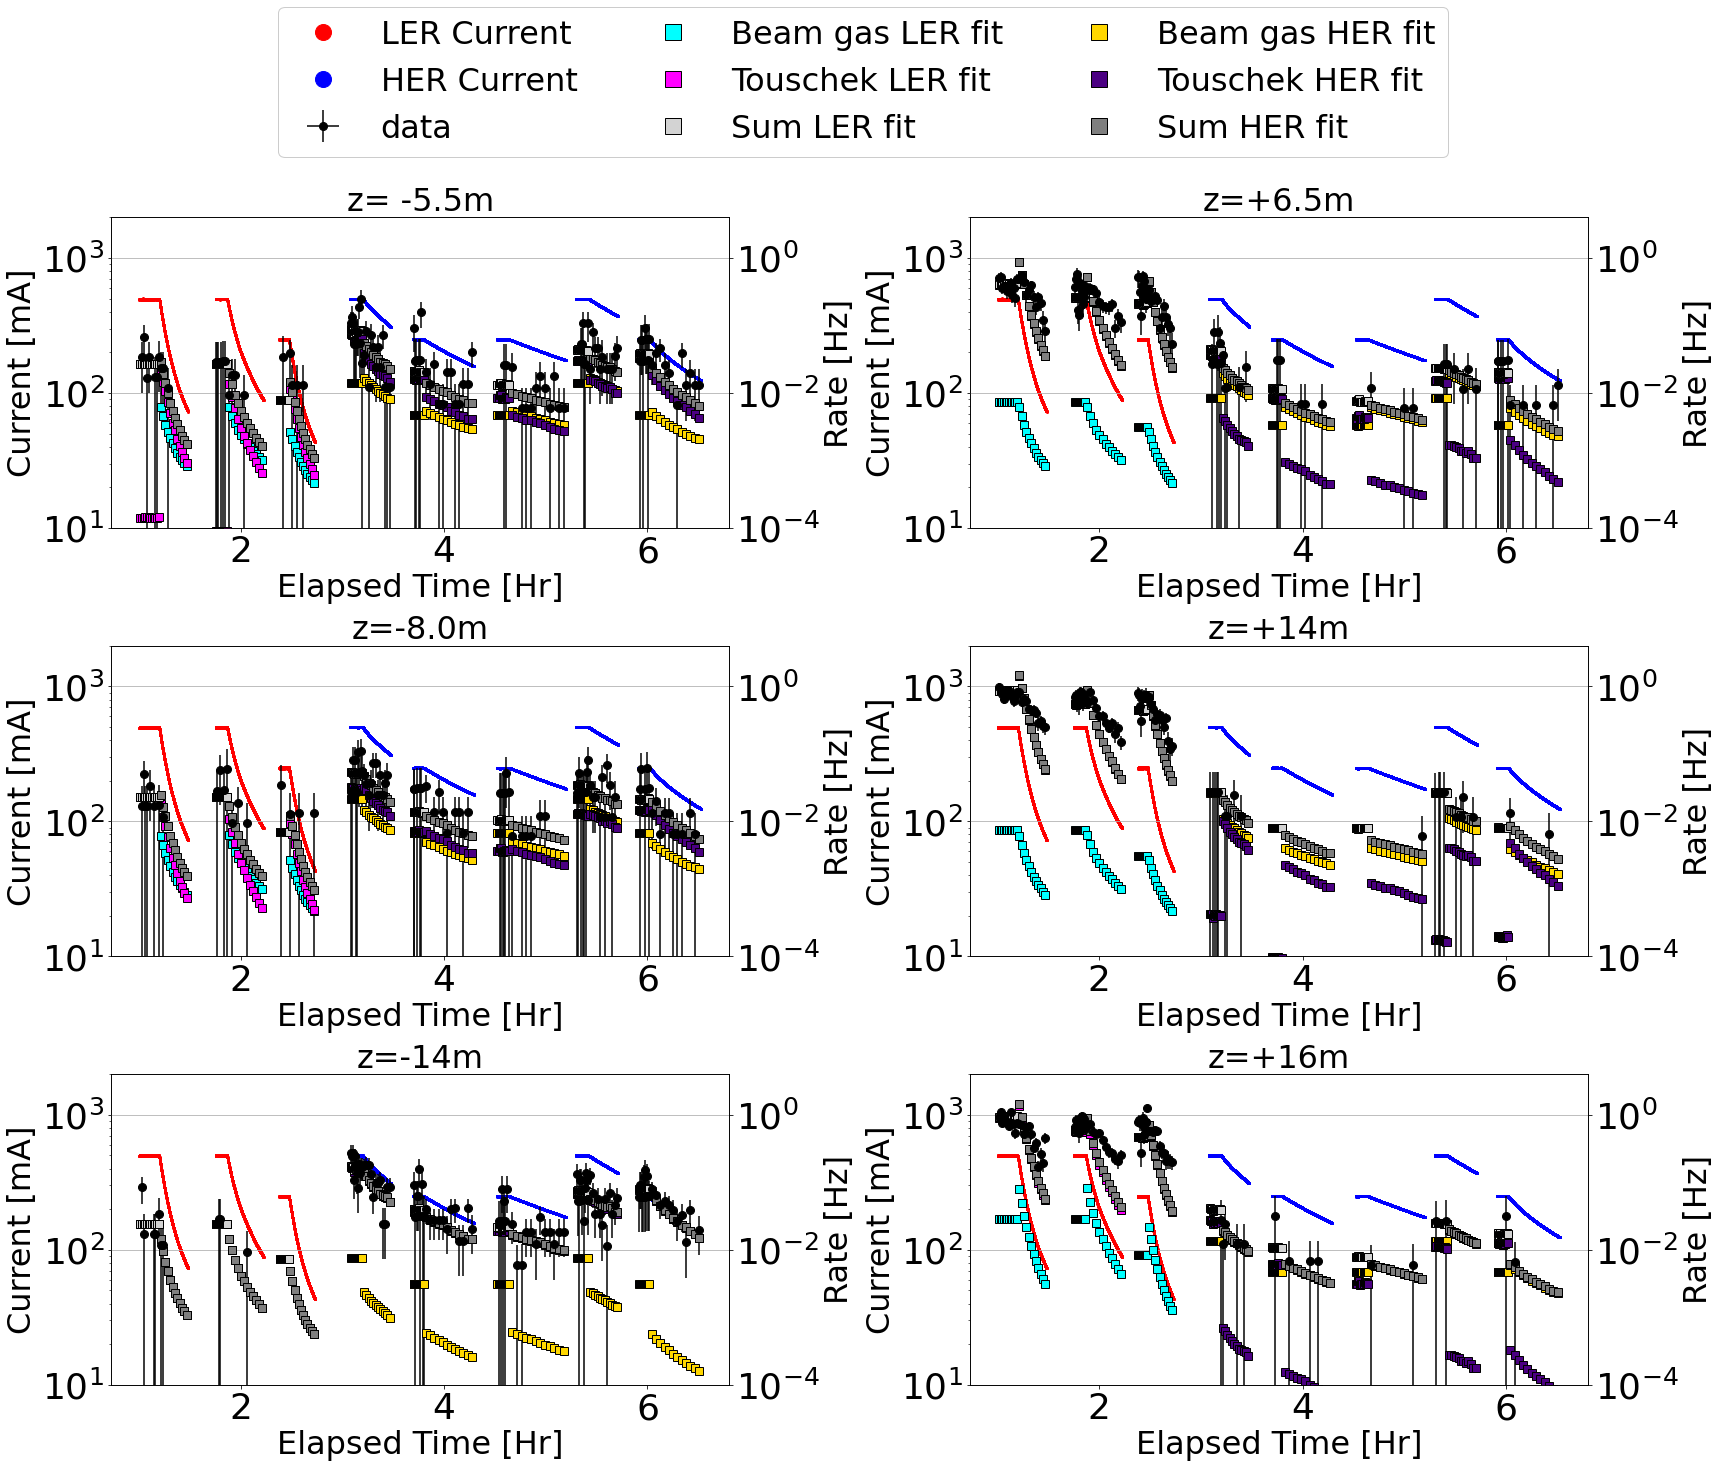

In [67]:
plt.rc('legend', fontsize=32)
plt.rc('xtick', labelsize=36)
plt.rc('ytick', labelsize=36)
plt.rc('axes', labelsize=32)
plt.rc('axes', titlesize=32)
plt.figure(figsize = (24,18))
i = 1
locations = ['z= -5.5m', 'z=+6.5m', 'z=-8.0m', 'z=+14m', 'z=-14m', 'z=+16m']
for tpc in ['palila', 'iiwi', 'tako', 'nene', 'elepaio', 'humu']:
    plt.subplot(3,2,i)
    plt.plot(data.loc[(data['LER_study_flag']==1) & (data['Cont_inj_flag']==1)]['ts'], data.loc[(data['LER_study_flag']==1) & (data['Cont_inj_flag']==1)]['I_LER'], 'o', color = 'red',markersize = 2)
    plt.plot(data.loc[(data['LER_study_flag']==1) & (data['Decay_flag']==1)]['ts'], data.loc[(data['LER_study_flag']==1) & (data['Decay_flag']==1)]['I_LER'], 'o', color = 'red',markersize = 2)
    plt.plot(data.loc[(data['HER_study_flag']==1) & (data['Cont_inj_flag']==1)]['ts'], data.loc[(data['HER_study_flag']==1) & (data['Cont_inj_flag']==1)]['I_HER'], 'o', color = 'blue',markersize = 2)
    plt.plot(data.loc[(data['HER_study_flag']==1) & (data['Decay_flag']==1)]['ts'], data.loc[(data['HER_study_flag']==1) & (data['Decay_flag']==1)]['I_HER'], 'o', color = 'blue',markersize = 2)
    plt.ylim(10,2000)
    plt.ylabel("Current [mA]")
    plt.xlabel('Elapsed Time [Hr]')
    plt.yscale("Log")
    plt.title("%s"%(locations[i-1]))
    plt.twinx()
    plt.grid()
    #if i%2 != 1:
    #    plt.ylim(0,1.5)
    #else:
    #    if i != 5:
    #        plt.ylim(0,0.2)
    #    else:
    #        plt.ylim(0,0.4)
    plt.yscale("Log")
    plt.ylim(1e-4,4)
    plt.plot(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts'], fit_bg['%s_Cont_inj_LER'%(tpc)][data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)].index.to_numpy()], 's', color = 'cyan', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts'], fit_bg['%s_Cont_inj_HER'%(tpc)][data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)].index.to_numpy()], 's', color = 'gold', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts'], fit_bg['%s_Decay_LER'%(tpc)][data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)].index.to_numpy()], 's', color = 'cyan', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts'], fit_bg['%s_Decay_HER'%(tpc)][data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)].index.to_numpy()], 's', color = 'gold', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts'], fit_t['%s_Cont_inj_LER'%(tpc)][data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)].index.to_numpy()], 's', color = 'magenta', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts'], fit_t['%s_Cont_inj_HER'%(tpc)][data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)].index.to_numpy()], 's', color = 'indigo', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts'], fit_t['%s_Decay_LER'%(tpc)][data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)].index.to_numpy()], 's', color = 'magenta', markersize = 8, markeredgecolor = 'black')
    plt.plot(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts'], fit_t['%s_Decay_HER'%(tpc)][data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)].index.to_numpy()], 's', color = 'indigo', markersize = 8, markeredgecolor = 'black')
    plt.errorbar(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts'], fit['%s_Cont_inj_LER'%(tpc)][data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)].index.to_numpy()], fit_err['%s_Cont_inj_LER'%(tpc)][data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)].index.to_numpy()], [0 for i in range(0,len(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]))], 's', color = 'lightgray', markersize = 8, markeredgecolor = 'black')
    plt.errorbar(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts'], fit['%s_Cont_inj_HER'%(tpc)][data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)].index.to_numpy()], fit_err['%s_Cont_inj_HER'%(tpc)][data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)].index.to_numpy()], [0 for i in range(0,len(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]))], 's', color = 'lightgray', markersize = 8, markeredgecolor = 'black')
    plt.errorbar(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts'], fit['%s_Decay_LER'%(tpc)][data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)].index.to_numpy()], fit_err['%s_Decay_LER'%(tpc)][data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)].index.to_numpy()], [0 for i in range(0,len(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)]))], 's', color = 'tab:gray', markersize = 8, markeredgecolor = 'black')
    plt.errorbar(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts'], fit['%s_Decay_HER'%(tpc)][data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)].index.to_numpy()], fit_err['%s_Decay_HER'%(tpc)][data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)].index.to_numpy()], [0 for i in range(0,len(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)]))], 's', color = 'tab:gray', markersize = 8, markeredgecolor = 'black')
    p = plt.errorbar(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts'], data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)][tpc+'_neutrons'], data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)][tpc+'_neutrons_err'], data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts_err'], 'o', markersize = 8, color = 'black', label = 'data')
    plt.errorbar(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts'], data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)][tpc+'_neutrons'], data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)][tpc+'_neutrons_err'], data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Cont_inj_flag']==1)]['ts_err'], 'o', markersize = 8, color = 'black', label = 'data')
    plt.errorbar(data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts'], data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)][tpc+'_neutrons'], data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)][tpc+'_neutrons_err'], data_avg.loc[(data_avg['LER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts_err'], 'o', markersize = 8, color = 'black', label = 'data')
    plt.errorbar(data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts'], data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)][tpc+'_neutrons'], data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)][tpc+'_neutrons_err'], data_avg.loc[(data_avg['HER_study_flag']==1) & (data_avg['Decay_flag']==1)]['ts_err'], 'o', markersize = 8, color = 'black', label = 'data')
    plt.ylabel("Rate [Hz]")
    custom_lines = [Line2D([0], [0], color='red', label='LER Current', marker='o', linewidth = 0, markersize = 16),
                    Line2D([0], [0], color='blue', label='HER Current', marker='o', linewidth = 0, markersize = 16),
                    p,
                Line2D([0], [0], color='cyan', label='Beam gas LER fit', marker='s',markeredgecolor = 'black', linewidth = 0, markersize = 16),
                    Line2D([0], [0], color='magenta', label='Touschek LER fit', marker='s',markeredgecolor = 'black', linewidth = 0, markersize = 16),
                    Line2D([0], [0], color='lightgray', label='Sum LER fit', marker='s',markeredgecolor = 'black', linewidth = 0, markersize = 16),
                Line2D([0], [0], color='gold', label='Beam gas HER fit', marker='s', markeredgecolor = 'black',linewidth = 0, markersize = 16),
                   Line2D([0], [0], color='indigo', label='Touschek HER fit', marker='s', markeredgecolor = 'black',linewidth = 0, markersize = 16),
                    Line2D([0], [0], color='tab:gray', label='Sum HER fit', marker='s', markeredgecolor = 'black',linewidth = 0, markersize = 16)
                   ]
    i+=1
plt.tight_layout()
plt.legend(handles=custom_lines, loc='lower right', framealpha = 1, ncol = 3, bbox_to_anchor=(0.8, 3.9))
plt.savefig("fit_comparison.png", bbox_inches='tight')

36    0.000036
37    0.000025
38    0.000018
39    0.000013
40    0.000010
41    0.000007
42    0.000006
43    0.000005
44    0.000004
45    0.000003
46    0.000003
47    0.000002
48    0.000031
49    0.000021
50    0.000015
51    0.000011
52    0.000008
53    0.000006
54    0.000005
55    0.000004
56    0.000004
57    0.000003
58    0.000003
59    0.000002
60    0.000016
61    0.000013
62    0.000009
63    0.000007
64    0.000005
65    0.000004
66    0.000003
67    0.000003
68    0.000002
69    0.000002
70    0.000002
71    0.000001
dtype: float64